In [9]:
import random


class State:
    def __init__(self, state):
        # state is a list (solution)
        self.state = state

    # number of attacks
    def evaluation(self):
        h = 0
        # check for diagonal attacks
        for i in range(0, len(self.state)):
            for j in range(0, len(self.state)):
                if j > i:
                    if abs(i - j) == abs(self.state[i] - self.state[j]):
                        h += 1
                    # Evaluate each column for detecting attacks
                    if abs(self.state[i] - self.state[j]) == 0:
                        h += 1
        return h

    def getCurrentState(self):
        return self.state

    def neighbor(self):  # returns the best neighbor
        # Dictionary with all possible solution for each queen
        neighbors = {}
        for i in range(0, len(self.state)):
            for j in range(0, len(self.state)):
                if j != self.state[i]:
                    temp = self.state.copy()
                    temp[i] = j
                    # Generate a new solution list (state)
                    temp = State(temp)
                    # Evaluate the number of attacks (heuristic) for each new state
                    # list of neighbors' evaluation value
                    neighbors[(i, j)] = temp.evaluation()

        best_neighbors = {}  # Store the best heuristic
        best_h = self.evaluation()  # assign current state evaluation to the best evaluation

        # Iterate dict itens (i,j)
        # Where i is the key and h the value (number of attacks)
        for i, h in neighbors.items():
            # check if there is a better state than the current state
            if h < best_h:
                best_h = h
                if len(best_neighbors) > 0:
                    # reset the dictionary if a better h is found
                    best_neighbors.clear()
                best_neighbors[i] = best_h
            if h == best_h:
                best_neighbors[i] = best_h

        # if there are more than one better solution then choose one of them randomly
        # It is also possible to choose in a greedy way
        if len(best_neighbors.keys()) > 0:
            random_index = random.randint(0, len(best_neighbors.keys()) - 1)
            list_neighbors = list(best_neighbors.keys())
            self.state[list_neighbors[random_index]
                       [0]] = list_neighbors[random_index][1]

        return State(self.state)

In [10]:

from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# board graphic based on the solution


def board(solution):
    matrix = np.zeros([8, 8], dtype=int)
    matrix = matrix.tolist()
    for item in solution:
        for i in range(len(solution)):
            if i == item:
                for j in range(len(solution)):
                    if j == solution.index(item):
                        matrix[i][j] = 1

    l = []
    for i in range(1, len(solution)+1):
        l.append(i)

    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, linewidths=.8, cbar=False,
                cmap='Set3', xticklabels=l, yticklabels=l)


def hill_climbing(initial_state):
    current_state = State(initial_state)
    while True:
        best_neighbor = current_state.neighbor()
        if best_neighbor.evaluation() >= current_state.evaluation():
            return current_state
        current_state = best_neighbor


def random_restart(initial_state):
    state = State(initial_state)
    count = 0
    while State(initial_state).evaluation() > 0 & count < 5:
        # Shuffle the solution (generate a new state)
        shuffle(initial_state)
        state = hill_climbing(initial_state)
        count += 1
    return state


def simple_hill_climbing(initial_state):
    state = State(initial_state)
    count = 0
    while State(initial_state).evaluation() > 0 & count < 5:
        state = hill_climbing(initial_state)
        initial_state = state.getCurrentState()
        count += 1
    return state

[6, 1, 3, 0, 7, 4, 2, 5]


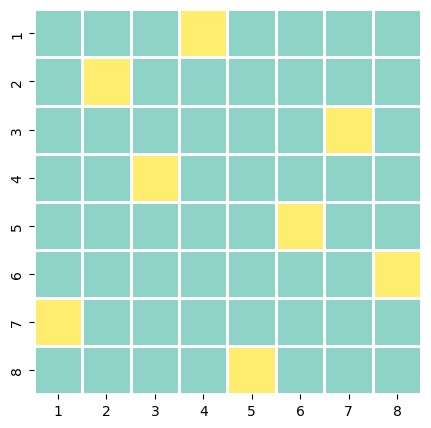

In [11]:

initial_state = [0, 1, 3, 0, 7, 5, 2, 1]
solution = simple_hill_climbing(initial_state)
print(solution.getCurrentState())
board(solution.getCurrentState())


[4, 7, 3, 0, 2, 5, 1, 6]


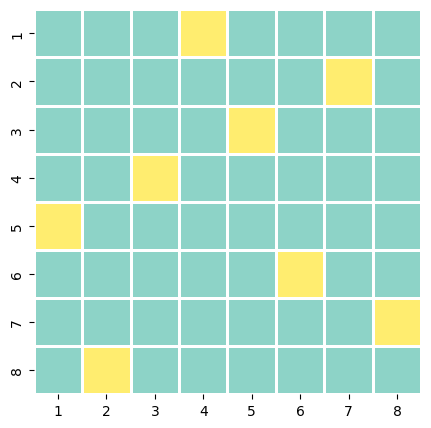

In [12]:
initial_state = [0, 1, 3, 0, 7, 5, 2, 1]
solution = random_restart(initial_state)
print(solution.getCurrentState())
board(solution.getCurrentState())